<a href="https://colab.research.google.com/github/ASK3Y/Computational-Physics/blob/main/ode/ode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Runge-Kutta Methods of Numerical Integration

## 1st Order Runge Kutta:  Euler's Method

We already explored Euler's method in the previous tutorial. It turns out Euler's method is the first-order scheme of the Runge Kutta family of integrators. Once again we will solve the differential equation for exponential growth: $$\frac{dy}{dt}=ay$$

In the following section, we re-write our Euler code around two functions:
* First, we define a function to return the derivative $f(y,t)$ in our differential equation:  $$\frac{dy}{dt}=f(y,t).$$
* Second, we create a function called `Euler()` that performs the numerical integration

Here are the details for each function.

**Derivative Function:**
* We name our function that returns the derivative in the exponential growth ODE `deriv_exp()1.
* Passed parameters:
    * time
    * dependent variable $y$
    * growth rate parameter $a$
* Returned value:
    * derivative $ay$

**Euler Integration Function**
* We name this function `Euler()`
* Passed parameters:
    * `deriv` = function that returns the derivative defining our ODE
    * `y0` = initial condition for variable `y`
    * `tmax` = upper integration limit in time
    * `params` = tuple containing one or more parameters that will be passed to the derivative function.
* Returned values:
    * `t` = numpy array containing time values in the numerical integration
    * `y` = result of the numerical integration

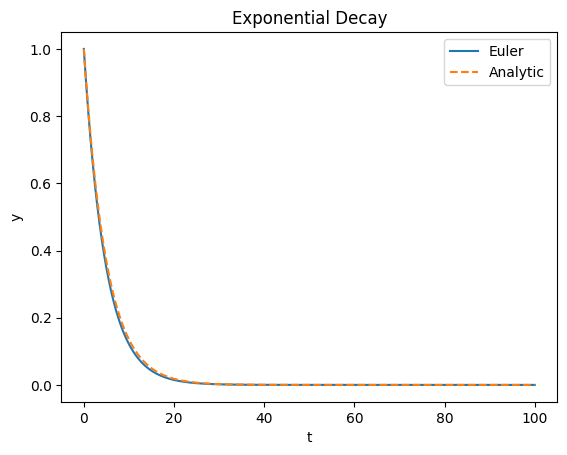

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#########  Derivative Function  #########
#
# This function returns the derivative for the ODE dy/dt = f(y,t)

def deriv_exp(t, y, a):
    return a*y


#########  Euler Integration  #########

def Euler(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    N = int(tmax/dt)+1    # number of steps in simulation
    y = np.zeros(N)       # array to store y values
    t = np.zeros(N)       # array to store times

    y[0] = y0             # assign initial value


    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        f = deriv_exp(t[n], y[n], params)
        y[n+1] = y[n] + f*dt
        t[n+1] = t[n] + dt

    return t, y


#########  Parameters  #########

a    = -0.2            # decay constant
tmax = 100             # maximum time
dt   = 0.5               # time step
y0   = 1               # initial value of y

params = a             # bundle derivative parameters together


#########  Perform Euler Integration  #########

t, y =  Euler(deriv_exp, y0, tmax, dt, params)


#########  Analytic Solution  #########

y_true = y0 * np.exp(a*t)


#########  Plot Solution  #########

plt.plot(t, y, label='Euler')
plt.plot(t, y_true, '--', label='Analytic')

plt.xlabel('t')                  # label the x and y axes
plt.ylabel('y')
plt.title("Exponential Decay")   # give the plot a title
plt.legend()                     # display the legend
plt.show()                       # display the plot

### ✅ Skill Check 1

In this example, you will solve for the number of photons $n$ in a laser cavity. Use the example above to solve the following ODE for $n(t)$: $$ \frac{dy}{dt} = (GN_0 -k) n- (\alpha G) n^2$$ where $n$ is the number of photons in the laser field and
* $N_0$ = population of photons without laser action
* $G$     = gain coefficient
* $\alpha$ = rate at which atoms return to ground state
* $k$     = rate constant, where $1/k$ = lifetime of photon in laser

Specifications:
* Replace the `deriv_exp()` function with your own function to return the derivative of the number of laser photons
* Modify the main part of your program to set up and plot the number of photons as a function of time
* You shouldn't have to modify the `Euler()` function

Run your code to produce two plots:
* First plot. Show multiple trajectories for different initial conditions when the pumping steady state $N_0 = 0.5(k/G)$
    * Plot $n(t)$ for the initial conditions $n_0 = 0.1, 0.5. 1, 2, 3$ for $N_0 = 0.5$, $G=1$, $\alpha = 1$ and $k=1$.
* Second plot. Show multiple trajectories for different initial conditions when the pumping steady state $N_0 = 2.0(k/G)$
    * Plot $n(t)$ for the initial conditions $n_0 = 0.1, 0.5. 1, 2, 3$ for $N_0 = 0.5$, $G=1$, $\alpha = 1$ and $k=1$.

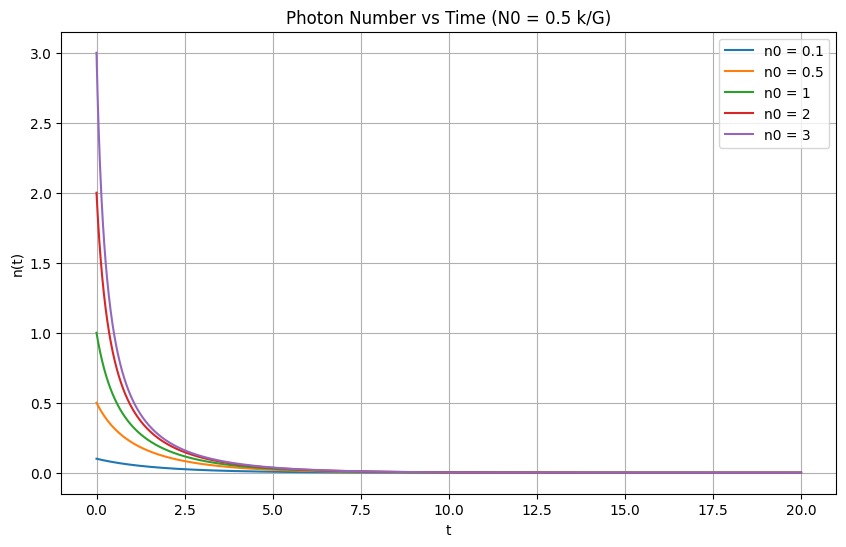

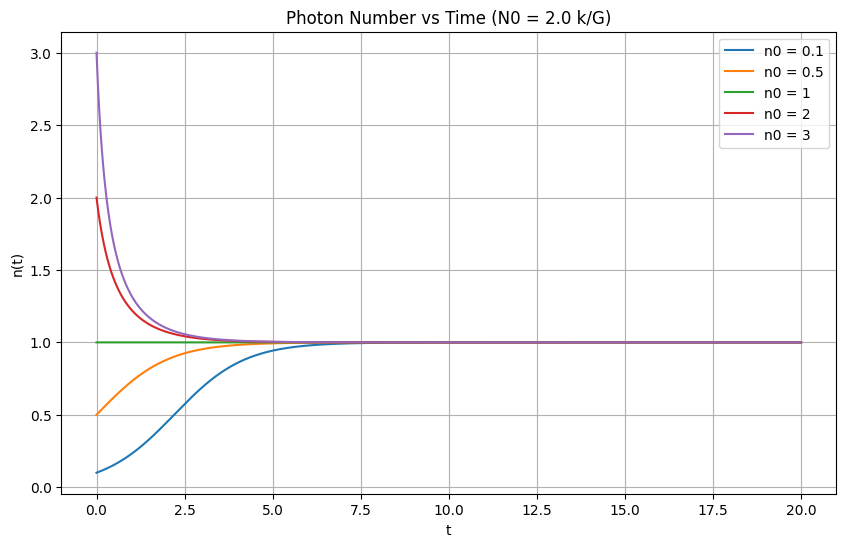

In [2]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# derivative function
def derivative_photons(t, n, params):
    G, N0, k, alpha = params
    return (G*N0 - k)*n - (alpha*G)*(n**2)

# euler integration
def Euler(derivative, y0, tmax, dt, params):
    N = int(tmax/dt) + 1
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0

    for i in range(N-1):
        f = derivative(t[i], y[i], params)
        y[i+1] = y[i] + f*dt
        t[i+1] = t[i] + dt
    return t, y

# parameters
G = 1
alpha = 1
k = 1
tmax = 20
dt = 0.01

initial_conditions = [0.1, 0.5, 1, 2, 3]

# plot 1
N0 = 0.5 * (k / G)
params = (G, N0, k, alpha)

plt.figure(figsize = (10, 6))
for n0 in initial_conditions:
    t, n = Euler(derivative_photons, n0, tmax, dt, params)
    plt.plot(t, n, label = f"n0 = {n0}")

plt.title("Photon Number vs Time (N0 = 0.5 k/G)")
plt.xlabel("t")
plt.ylabel("n(t)")
plt.legend()
plt.grid(True)
plt.show()

# plot 2
N0 = 2.0 * (k / G)
params = (G, N0, k, alpha)

plt.figure(figsize = (10, 6))
for n0 in initial_conditions:
    t, n = Euler(derivative_photons, n0, tmax, dt, params)
    plt.plot(t, n, label = f"n0 = {n0}")

plt.title("Photon Number vs Time (N0 = 2.0 k/G)")
plt.xlabel("t")
plt.ylabel("n(t)")
plt.legend()
plt.grid(True)
plt.show()

### ✅ Skill Check 2

Repeat Skill Check 1 using the Midpoint integration scheme. Replace the `Euler()` function with a `Midpoint()` function.


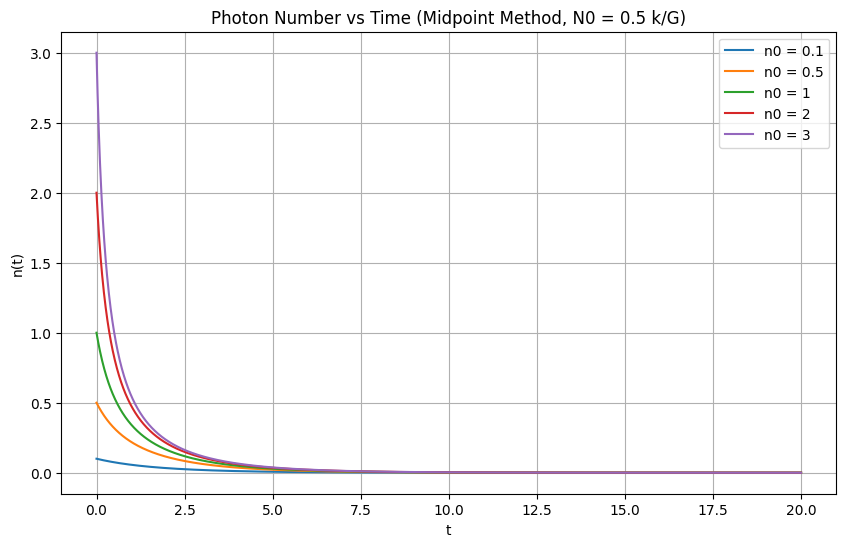

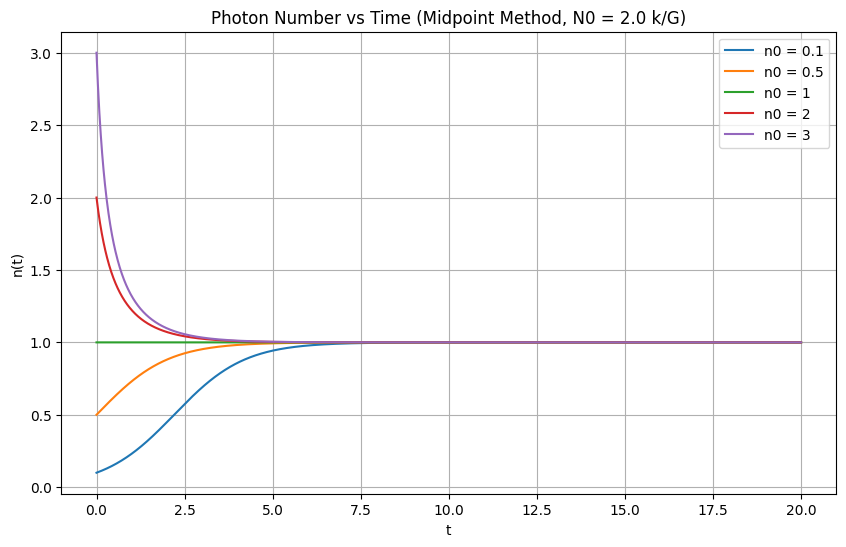

In [3]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# derivative function
def derivative_photons(t, n, params):
    G, N0, k, alpha = params
    return (G*N0 - k)*n - (alpha*G)*(n**2)

# midpoint integration
def midpoint(derivative, y0, tmax, dt, params):
    N = int(tmax / dt) + 1
    y = np.zeros(N)
    y = np.zeros(N)
    y[0] = y0

    for i in range(N-1):
        k1 = derivative(t[i], y[i], params)

        y_mid = y[i] + 0.5 * k1 * dt
        t_mid = t[i] + 0.5 * dt
        k2 = derivative(t_mid, y_mid, params)

        y[i+1] = y[i] + k2 * dt
        t[i+1] = t[i] + dt

    return t, y

# parameters
G = 1
alpha = 1
k = 1
tmax = 20
dt = 0.01

initial_conditions = [0.1, 0.5, 1, 2, 3]

# plot 1
N0 = 0.5 * (k / G)
params = (G, N0, k, alpha)

plt.figure(figsize = (10, 6))
for n0 in initial_conditions:
    t, n = midpoint(derivative_photons, n0, tmax, dt, params)
    plt.plot(t, n, label = f"n0 = {n0}")

plt.title("Photon Number vs Time (Midpoint Method, N0 = 0.5 k/G)")
plt.xlabel("t")
plt.ylabel("n(t)")
plt.legend()
plt.grid(True)
plt.show()

# plot 2
N0 = 2.0 * (k / G)
params = (G, N0, k, alpha)

plt.figure(figsize = (10, 6))
for n0 in initial_conditions:
    t, n = Euler(derivative_photons, n0, tmax, dt, params)
    plt.plot(t, n, label = f"n0 = {n0}")

plt.title("Photon Number vs Time (Midpoint Method, N0 = 2.0 k/G)")
plt.xlabel("t")
plt.ylabel("n(t)")
plt.legend()
plt.grid(True)
plt.show()